# Problem Definition

- We have temperature and humidity measurements at specific hours of the day.
- Our goal is to estimate the missing values for temperature and humidity throughout the day.
- By using spline interpolation, we aim to model the changes in temperature and humidity more smoothly.

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Create Dataset

In [2]:
# Hours of the day (0-23)
hours = np.array([0, 3, 5, 7, 11, 15, 19, 23])
# Temperature measurements (Celsius) at the specified hours
temperatures = np.array([10, 12, 11, 10, 15, 20, 18, 13])
# Humidity measurements (%) at the specified hours
humidity = np.array([80, 78, 75, 70, 65, 60, 65, 70])

# Creating Spline Interpolation Functions

In [3]:
from scipy.interpolate import CubicSpline

# Cubic Spline interpolation function for temperature
temp_spline = CubicSpline(hours, temperatures)
# Cubic Spline interpolation function for humidity
humidity_spline = CubicSpline(hours, humidity)

# Calculating Missing Values

In [4]:
# All hours of the day (from 0 to 23)
all_hours = np.arange(0, 24)
# Calculate temperature and humidity for all hours using the interpolation functions
interpolated_temperatures = temp_spline(all_hours)
interpolated_humidity = humidity_spline(all_hours)

In [5]:
interpolated_temperatures

array([10.        , 11.32771667, 11.94578751, 12.        , 11.63614166,
       11.        , 10.30061043, 10.        , 10.49389917, 11.65986032,
       13.24589131, 15.        , 16.69117287, 18.17231082, 19.31729336,
       20.        , 20.13203434, 19.77589639, 19.03181025, 18.        ,
       16.78068975, 15.47410361, 14.18046566, 13.        ])

In [6]:
interpolated_humidity

array([80.        , 79.35327761, 78.76495821, 78.        , 76.8233612 ,
       75.        , 72.48575671, 70.        , 68.24131104, 67.06159261,
       66.10107787, 65.        , 63.52367466, 61.93774747, 60.63294655,
       60.        , 60.32024032, 61.43741751, 63.08588594, 65.        ,
       66.91411406, 68.56258249, 69.67975968, 70.        ])

# Visualizing the Results

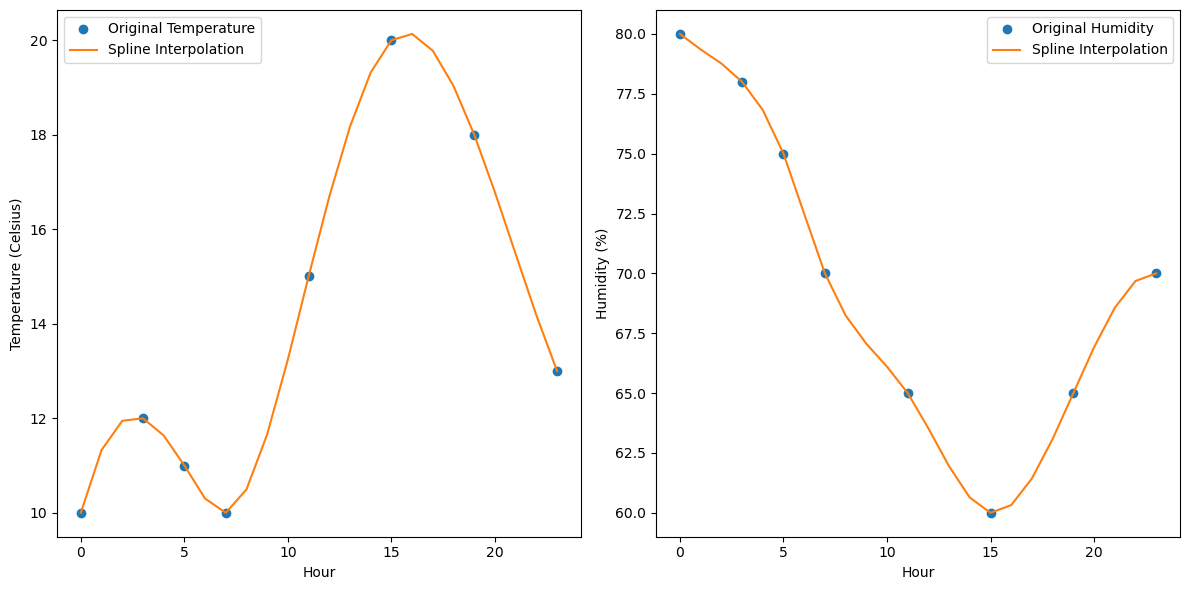

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hours, temperatures, 'o', label='Original Temperature')
plt.plot(all_hours, interpolated_temperatures, '-', label='Spline Interpolation')
plt.xlabel('Hour')
plt.ylabel('Temperature (Celsius)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hours, humidity, 'o', label='Original Humidity')
plt.plot(all_hours, interpolated_humidity, '-', label='Spline Interpolation')
plt.xlabel('Hour')
plt.ylabel('Humidity (%)')
plt.legend()

plt.tight_layout()
plt.show()

Spline interpolation provides smoother transitions between data points, offering more realistic predictions for fluctuating or periodic data.